In [1]:
import os
import sys
sys.path.append('D:\ProgramData\Anaconda3\envs\KKeras\Lib\site-packages')
import csv
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
print(os.path.abspath('__file__'))

lines = []
with open('./data/driving_log.csv') as csvfile:  # 相对路径，用./
    csvsheet = csv.reader(csvfile)
    for line in csvsheet:
        lines.append(line)

lines = lines[1:-1]  # Remove the title line
print(lines[0]) # show the first effective data, the structure should be 
                # [center pic], [left pic], [right pic], [steering],[throttle],[brake],[speed]

D:\udacity_proj\CarND-Behavioral-Cloning-P3\__file__
['IMG/center_2016_12_01_13_30_48_287.jpg', ' IMG/left_2016_12_01_13_30_48_287.jpg', ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0', ' 0', ' 0', ' 22.14829']


In [3]:
images = []
measurements = []
for line in lines:
    source_path = line[0]       # 看CSV，表里面第一项是地址
    #print(source_path)
    pic_name = source_path.split('/')[-1] #被‘/’分割后的最后一项
    #print(pic_name)
    current_path ='./data/IMG/'+pic_name
    image = cv2.imread(current_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# 因为cv2读取的是BGR因此要转换成RGB显示才正常,包括drive.py使用也是
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement) # get all the steering angle

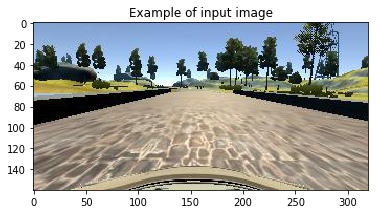

In [6]:
plt.imshow(images[1]) 
plt.title('Example of input image')
plt.show()

In [7]:
X_train = np.array(images)
Y_train = np.array(measurements)

## 数据准备完毕，开始构建网络

In [22]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D


In [21]:
model = Sequential()
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape = (160,320,3))) # 归一化，-0.5均值中心从0.5到0
model.add(Flatten())
model.add(Dense(1))

model.compile(loss = 'mse', optimizer = 'adam') #Regression问题，而不是Classification问
model.fit(X_train, Y_train,validation_split = 0.2, shuffle = True, epochs = 5)

model.save('model.h5')

Train on 6428 samples, validate on 1607 samples
Epoch 1/5
6428/6428 [==============================] - 6s 978us/step - loss: 1.6097 - val_loss: 1.7456
Epoch 2/5
6428/6428 [==============================] - 6s 947us/step - loss: 4.4704 - val_loss: 6.0116
Epoch 3/5
6428/6428 [==============================] - 6s 967us/step - loss: 4.1801 - val_loss: 2.9844
Epoch 4/5
6428/6428 [==============================] - 7s 1ms/step - loss: 2.8267 - val_loss: 2.8404
Epoch 5/5
6428/6428 [==============================] - 6s 981us/step - loss: 2.8153 - val_loss: 1.9796
